# AIMMS py example

The following cell imports necessary modules and initializes an AIMMS project. It sets the path to the AIMMS executable and the project directory. The `AimmsProject` object is created with the specified paths and project details. The cell also prints the AIMMS path and all exposed identifiers in the project.



In [1]:
import os

from aimms.project.project import Project

from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from test_with_jupyter_notebook import Project

aimms_path = os.getenv("AIMMSPATH", os.path.join( "E:/", "gitlab", "aimms", "aimms", "out", "aimms_runnable", "RelWithDebInfo", "Bin"))
print (f"aimms_path: {aimms_path}")

my_aimms = Project(
    aimms_path=aimms_path,
    aimms_project_path=os.path.join( ".", "test_models", "transport_optimization_reflection", "transport_optimization.aimms"),
    exposed_identifier_set_name="AllIdentifiers",
    checked=True,
)
my_aimms.generate_stub_file(os.path.join( ".", f"test_with_jupyter_notebook.pyi"))

print( f"all identifiers: {my_aimms.exposed_identifier_set}")

aimms_path: E:\gitlab\aimms\aimms\out\aimms_runnable\Debug\Bin
E:\gitlab\aimms\aimms\out\aimms_runnable\Debug\Bin --as-server ".\test_models\transport_optimization_reflection\transport_optimization.aimms" 
all identifiers: ['Main_template_project', 'locations', 'l', 'warehouses', 'w', 'customers', 'c', 'demand', 'supply', 'unit_transport_cost', 'satisfy_demand', 'satisfy_supply', 'transport', 'total_transport_cost', 'mp', 'MainInitialization', 'PostMainInitialization', 'MainExecution', 'PreMainTermination', 'MainTermination']


# Assign data to sets

In [2]:
customers_data : list[str]  = [ "Houston", "Phoenix", "New York" ]
warehouses_data : list[str] = [ "Philadelphia", "San Francisco, Californië", "Los Angeles County", "Chicago" ]
locations_data : list[str] = customers_data + warehouses_data

my_aimms.locations.assign( locations_data )
my_aimms.warehouses.assign( warehouses_data )
my_aimms.customers.assign( customers_data )

# Assign data to parameters

In [3]:
my_aimms.demand.assign({
    ("Houston"):50,
    ("Phoenix"):60,
    ("New York"):80
})

my_aimms.supply.assign({
    ("Philadelphia"):70,
    ("San Francisco, Californië"):80,
    ("Los Angeles County"):60,
    ("Chicago"):20
})

my_aimms.unit_transport_cost.assign({
    ("Philadelphia", "Houston"): 5.0,
    ("Philadelphia", "Houston"): 8.0,
    ("Philadelphia", "Phoenix"): 12.0,
    ("Philadelphia", "New York"): 2.0,
    ("San Francisco, Californië", "Houston"): 5.0,
    ("San Francisco, Californië", "Phoenix"): 2.0,
    ("San Francisco, Californië", "New York"): 12.0,
    ("Los Angeles County", "Houston"): 8.0,
    ("Los Angeles County", "Phoenix"): 3.0,
    ("Los Angeles County", "New York"): 12.0
})  

# View the assigned data

In [4]:
print(f"locations: {my_aimms.locations.data()}")
print(f"customers: {my_aimms.customers.data()}")
print(f"warehouses: {my_aimms.warehouses.data()}")
print(f"demand: {my_aimms.demand.data()}")
print(f"supply: {my_aimms.supply.data()}")
print(f"unit_transport_cost: {my_aimms.unit_transport_cost.data()}")

locations: ['Houston', 'Phoenix', 'New York', 'Philadelphia', 'San Francisco, Californië', 'Los Angeles County', 'Chicago']
customers: ['Houston', 'Phoenix', 'New York']
warehouses: ['Philadelphia', 'San Francisco, Californië', 'Los Angeles County', 'Chicago']
demand: {('Houston',): 50.0, ('Phoenix',): 60.0, ('New York',): 80.0}
supply: {('Philadelphia',): 70.0, ('San Francisco, Californië',): 80.0, ('Los Angeles County',): 60.0, ('Chicago',): 20.0}
unit_transport_cost: {('Philadelphia', 'Houston'): 8.0, ('Philadelphia', 'Phoenix'): 12.0, ('Philadelphia', 'New York'): 2.0, ('San Francisco, Californië', 'Houston'): 5.0, ('San Francisco, Californië', 'Phoenix'): 2.0, ('San Francisco, Californië', 'New York'): 12.0, ('Los Angeles County', 'Houston'): 8.0, ('Los Angeles County', 'Phoenix'): 3.0, ('Los Angeles County', 'New York'): 12.0}


# Retrieve variable data

In [5]:
my_aimms.MainExecution()
print(f"total_transport_cost: {my_aimms.total_transport_cost.data()}")
print(f"transport: {my_aimms.transport.data()}")

total_transport_cost: 480.0
transport: {('Philadelphia', 'New York'): 70.0, ('San Francisco, Californië', 'Houston'): 40.0, ('San Francisco, Californië', 'Phoenix'): 40.0, ('Los Angeles County', 'Phoenix'): 20.0, ('Chicago', 'Houston'): 10.0, ('Chicago', 'New York'): 10.0}


# Use python ecosystem to display table and heatmap

In [6]:
# display the results in a table
import pandas as pd

df = pd.Series(my_aimms.transport.data()).unstack(0)
df

,Chicago,Los Angeles County,Philadelphia,"San Francisco, Californië"
Houston,10.0,NaN,NaN,40.0
New York,10.0,NaN,70.0,NaN
Phoenix,NaN,20.0,NaN,40.0


<Axes: >

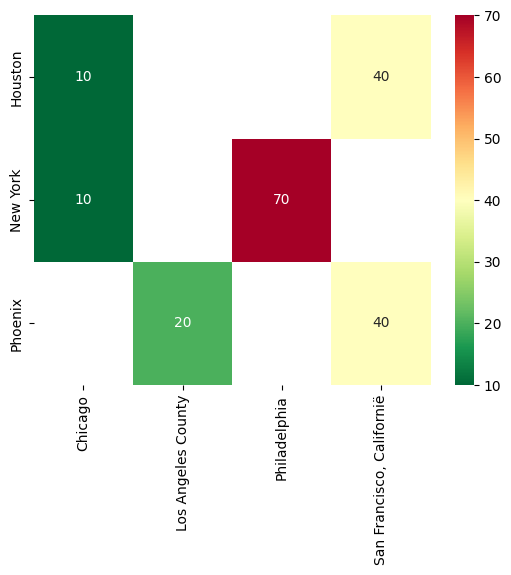

In [7]:
# visualize the df into a nice plot
import seaborn as sns

# from red to green reversed
sns.heatmap(df, annot=True, cmap="RdYlGn_r")
# also show the values on a map like google maps


# Display data on world map
Get locations for use in world map

In [8]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')

latitudes = []
longitudes = []

for location in locations_data:
    try:
        location = geolocator.geocode(location, timeout=10)
        print(location, location.latitude, location.longitude) # type: ignore
        latitudes.append(location.latitude) # type: ignore
        longitudes.append(location.longitude) # type: ignore
    except:
        print (f"location {location} not found")
        


Houston, Harris County, Texas, United States 29.7589382 -95.3676974
Phoenix, Maricopa County, Arizona, United States 33.4484367 -112.074141
City of New York, New York, United States 40.7127281 -74.0060152
Philadelphia, Philadelphia County, Pennsylvania, United States 39.9527237 -75.1635262
San Francisco, California, United States 37.7792588 -122.4193286
Los Angeles County, California, United States 34.3155072 -118.209681
Chicago, Cook County, Illinois, United States 41.8755616 -87.6244212


Add supply and demand locations to map

In [9]:
import folium
from folium.plugins import PolyLineTextPath
from branca.element import MacroElement
#from branca.colormap import rgb
from matplotlib.colors import to_hex

# Set the latitude and longitude of the center of the map
latitude = sum(latitudes) / len(latitudes)
longitude = sum(longitudes) / len(longitudes)

my_map = folium.Map(location=[latitude, longitude], zoom_start=4, tiles='CartoDB dark_matter')

location_list = list(locations_data)

for i in range(len(latitudes)):
    folium.Marker([latitudes[i], longitudes[i]], popup=location_list[i], tooltip=location_list[i]).add_to(my_map)

print(df)

# make a map from transport_data with key tuple from supply and demand longitudes and latitudes mapped to the amount
map_data = {}
for key, value in my_aimms.transport.data().items():
    supply, demand = key # type: ignore
    supply_lat = latitudes[location_list.index(supply)]
    supply_long = longitudes[location_list.index(supply)]
    demand_lat = latitudes[location_list.index(demand)]
    demand_long = longitudes[location_list.index(demand)]
    map_data[(supply_lat, supply_long, demand_lat, demand_long)] = value
            
print (map_data)


# Circles at the locations with the size of the supply and demand
for location in location_list:
    lat = latitudes[location_list.index(location)]
    long = longitudes[location_list.index(location)]
    supply = 0
    demand = 0
    for key, value in my_aimms.transport.data().items():
        supply_key, demand_key = key # type: ignore
        if supply_key == location:
            supply += value
        if demand_key == location:
            demand += value
    if supply > 0:
        search_tuple = tuple([location])
        original_supply = my_aimms.supply.data()[search_tuple] # type: ignore
        
        if not original_supply == supply:
            # Add green circle for original supply
            folium.CircleMarker(
                location=[lat, long],
                radius=original_supply * 0.5,  # Scale down the radius
                color='blue',
                fill=100,
                fill_color='blue',
                fill_opacity  = 0.3,
                tooltip=f"available supply: {original_supply}"
            ).add_to(my_map)
        
        folium.CircleMarker(
            location=[lat, long],
            radius=supply * 0.5,  # Scale down the radius
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity  = 0.6,
            tooltip=f"used supply: {supply}" # type: ignore
        ).add_to(my_map)
        
    if demand > 0:
        folium.CircleMarker(
            location=[lat, long],
            radius=demand * 0.5,  # Scale down the radius
            color='cyan',
            fill=True,
            fill_color='cyan',
            fill_opacity  = 0.6,
            tooltip=f"Demand: {demand}"
        ).add_to(my_map)


          Chicago  Los Angeles County  Philadelphia  San Francisco, Californië
Houston      10.0                 NaN           NaN                       40.0
New York     10.0                 NaN          70.0                        NaN
Phoenix       NaN                20.0           NaN                       40.0
{(39.9527237, -75.1635262, 40.7127281, -74.0060152): 70.0, (37.7792588, -122.4193286, 29.7589382, -95.3676974): 40.0, (37.7792588, -122.4193286, 33.4484367, -112.074141): 40.0, (34.3155072, -118.209681, 33.4484367, -112.074141): 20.0, (41.8755616, -87.6244212, 29.7589382, -95.3676974): 10.0, (41.8755616, -87.6244212, 40.7127281, -74.0060152): 10.0}


Also show transport on map

In [ ]:
import numpy as np

def own_curve(start, end, curve=0.3, num_points=100):
    
    mirrorstart = (-start[1], start[0])
    mirrorend = (-end[1], end[0])   
    # Control points
    control_points = np.array([
        start, 
        end,
        mirrorstart,
        mirrorend,    
    ])
        # Generate t values
    t_values = np.linspace(0, 1, num_points)
    
    curve_points = []
    for t in t_values:
        point = t * control_points[0] + (1-t) * control_points[1] + curve*t*(1-t)*(control_points[2] - control_points[3])   
        curve_points.append(tuple(point))
    
    return curve_points    


for key, value in map_data.items():
    supply_lat, supply_long, demand_lat, demand_long = key
    curve = own_curve([supply_lat, supply_long], [demand_lat, demand_long])
    line = folium.PolyLine(
        locations=curve,
        color=to_hex((0.1, 0.3 if value<20 else 1, 0)),
        weight=value if value <20 else value/5, #value/5,
        smooth_factor=1.5,  # Adjust this value to control the smoothness of the curve
        attributes={'fill': 'red', 'font-size': '15px'}
    )
    line.add_to(my_map)

# Add legend
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: 90px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white; opacity: 0.8;">
     &nbsp; <i class="fa fa-circle" style="color:blue"></i>&nbsp; Supply (total and utilized)<br>
     &nbsp; <i class="fa fa-circle" style="color:cyan"></i>&nbsp; Demand <br>
     &nbsp; <svg height=\"10\" width=\"20\">\n",
     "       <line x1=\"0\" y1=\"5\" x2=\"20\" y2=\"5\" style=\"stroke:rgb(0,255,0);stroke-width:2\" />\n",
     "     </svg>&nbsp; Transport (major)<br>     &nbsp; <svg height=\"10\" width=\"20\">\n", 
     "       <line x1=\"0\" y1=\"5\" x2=\"20\" y2=\"5\" style=\"stroke:rgb(0,75,0);stroke-width:2\" />\n",
     "     </svg>&nbsp; Transport (minor)<br> </div>
'''
my_map.get_root().html.add_child(folium.Element(legend_html)) # type: ignore

my_map

: 